# Stochastic Music Experiment - Read Me

Wild Sound Explorers 2022 Summer

yiman@stanford.edu

In [213]:
# import python modules
import numpy as np
π = np.pi
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 5)  # make the graphs wider
from numpy.random import default_rng
rng = default_rng()
import sounddevice as sd
sd.default.channels = 1
import soundfile as sf
from scipy.fft import rfft, irfft, rfftfreq

In [214]:
# import all recorded samples
# each audio sample is 1 second long
# audio samples processed on Audacity
#music_samples, music_sc = sf.read('peppa.wav')

In [215]:
# defining all the signals we are going to use as building blocks for music
# generic parameters
tmax = 1                       # end of signal in "real" time (seconds)
fs = 48000                     # sampling frequency
t = np.arange(0, tmax, 1/fs)   # time vector t[n]

chrom_scale = [261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00, 415.30, 440.00, 466.16, 493.88]
chrom_names = ['C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'Ab4', 'A4', 'Bb4', 'B4']
chrom = {}
for i in range(len(chrom_names)):
    name = chrom_names[i]
    f = chrom_scale[i]
    chrom[name] = np.sin(2*π*f*t) # signal vector x[n]

In [216]:
def plot_fft(x):
    Ts = 1/fs
    f_fft = rfftfreq(x.size, Ts)
    x_fft = rfft(x)
    plt.plot(f_fft[200:500], np.abs(x_fft)[200:500])
    plt.xlabel("frequency (Hz)")
    plt.ylabel("amplitude");

# def inverse_fft
#     x_recovered = irfft(x_fft)
#     # just use the same `t` from before
#     plt.plot(t, x_recovered)
#     plt.show()

In [217]:
def rand_message(num):
    message = []
    while len(message) < num:
        r = rng.integers(0, 12)
        if r not in message: 
            message.append(r)
    return message

def rand_notes(num):
    message = rand_message(num)
    notes = []
    for n in message:
        print(n)
        notes.append(chrom[n])
    return notes

In [231]:
sd.play(rand_notes(3))

9


KeyError: 9

In [220]:
def rand_chord(num):
    message = rand_message(num)
    chord = sum_chord(message)
    return chord

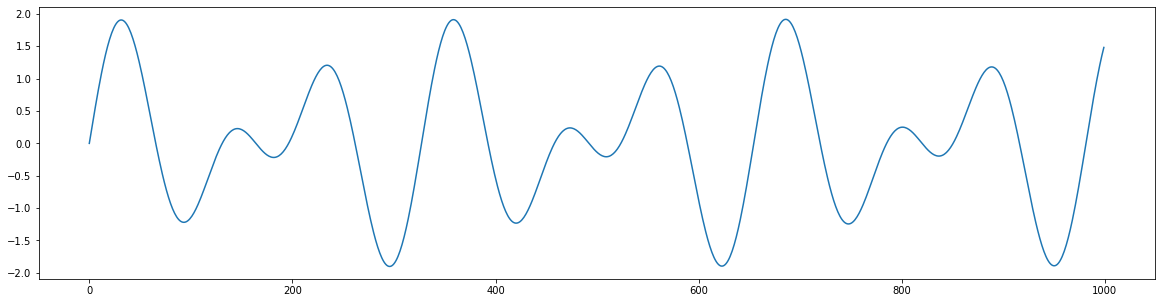

In [222]:
sd.play(rand_chord(1))

In [223]:
# # plot the whole signal in real time
# plt.plot(t, x)
# plt.show()
# # plot the whole signal against sample index
# plt.plot(x)
# plt.show()
# plot just the first 500 samples of the signal
# plt.plot(t[0:500], x[0:500])
# plt.show()

In [224]:
silence = 0.5  # seconds
x = np.append(x, np.zeros(int(silence*fs)))
t = np.arange(0, tmax+silence, 1/fs)

# play a signal
sd.play(x, fs)
# play and record simultaneously
y = sd.playrec(x, fs, blocking=True)

[1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1]


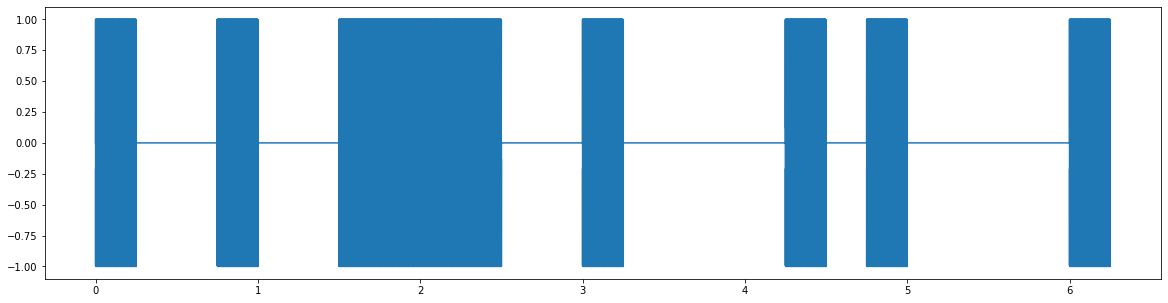

In [225]:
# imcorporate randomeness into our musical system
# generate a list of random 0s and 1s
message = rng.integers(0, 2, 24)
message = np.insert(message, 0, 1)  # always start the message with a 1
print(message)
rate = 4    # bits per second, can increase later
fc = 2300   # chosen carrier frequency

# generate the on off key (OOK) modulated signal here, then plot it against time
t = np.arange(0, len(message)*(1/rate), 1/fs)
x = [message[int(i*rate/fs)]*np.sin(2*np.pi*fc*t[i]) for i in range(len(t))]
plt.plot(t, x)

[8, 1]
0
1


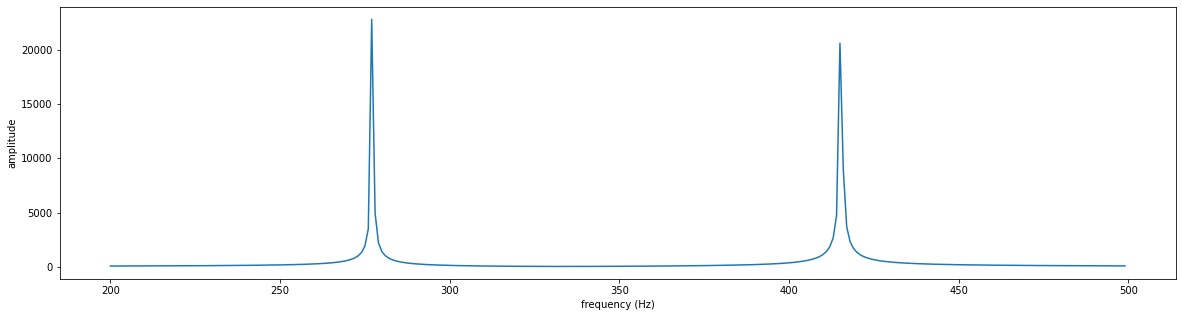

In [226]:
plot_fft(random_chord(2))

In [227]:
def bandpass(spectrum, fs, fmin, fmax):
    filtered = np.zeros(spectrum.size, dtype=complex)
    N = 2 * spectrum.size
    imin = int(fmin * N / fs)
    imax = int(fmax * N / fs)
    filtered[imin:imax] = spectrum[imin:imax]
    return filtered